In [1]:
import numpy as np 
import matplotlib.pyplot as plt
from matplotlib import animation
from matplotlib.animation import FuncAnimation
import os
from IPython.display import HTML


from gp_videos import sample_video
%load_ext autoreload
%autoreload 2

# We need: 
# 5 x 2s video (30 fps, 36 x 36 pixels) for each T and L 
# T : [0.5, 1, 2, 4, 8, 16, 32] frames 
# L : [0.5, 1, 2, 4, 8, 16, 32] pixels

In [23]:
results_dir = 'results/24042024_1120_2/' 

N_x = 36
N_y = 36
N_t = 60
Ls = [0.5,1,2,4,8,16,32]
N_L = len(Ls)
Ts = [0.5,1,2,4,8,16,32]
N_T = len(Ts)
ids = [0,1,2,3,4]
N_it = len(ids)

data_array = np.zeros((N_x, N_y, N_t, N_it, N_L, N_T))

# Load the results and write them into data array 
for filename in os.listdir(results_dir):
    if filename.endswith('.npz'):
        results = np.load(results_dir + filename, allow_pickle=True)
        R = results['results']
        L_idx = results['L_idx'] 
        T_idx = results['T_idx'] 
        # i = results['id']
        # np.savez(f"results/24042024_1120_2/{filename}", results=R, L_idx=L_idx, T_idx=T_idx, id=i)

        # print(L_idx, T_idx)
        id = results['id']
        data_array[:,:,:,id,L_idx,T_idx] = R

In [26]:
# Save the data array
np.savez('video_data.npz',video=data_array)

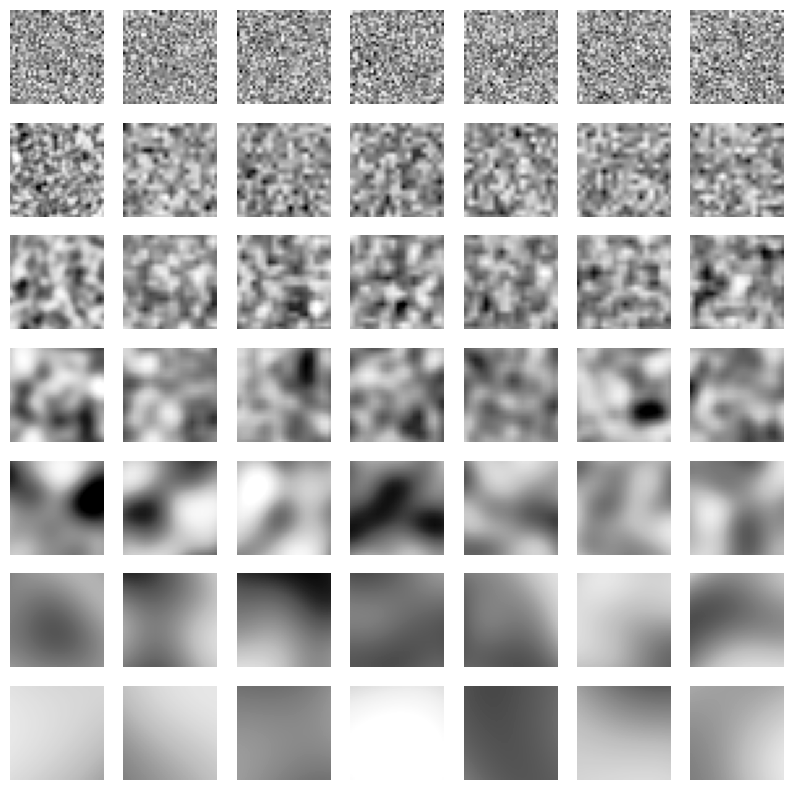

In [24]:
# Make anmated video of th evideo for each T and L

# Function to update the plot for each frame
def update(frame):
    fig = plt.gcf()
    for i in range(ax.shape[0]):
        for j in range(ax.shape[1]):
            ax[i,j].cla()
            ax[i,j].set_aspect('equal')
            ax[i,j].axis('off')
            ax[i,j].imshow(data_array[:,:,frame,0,i,j], cmap='Greys',vmin=-3,vmax=3)
fig, ax = plt.subplots(N_L,N_T,figsize=(10,10))
anim = FuncAnimation(fig, update, frames=N_t, interval=1000/30)
HTML(anim.to_html5_video())

In [13]:
from tqdm import tqdm 
Ls = [0.5,1,2,4,8,16,32]
Ts = [0.5,1,2,4,8,16,32]
for i in range(5):
    LT = []
    Lid = 0
    for Tid in [0,1,2,3,4,5,6]:
        LT.append((Lid,Tid))
    Tid = 0
    for Lid in [1,2,3,4,5,6]: # skip 0th
        LT.append((Lid,Tid))
    for (L,T) in tqdm(LT):
        v = sample_video(L=Ls[L],T=Ts[T],N_x=36,N_y=36,N_t=60)
        random_hash = str(np.random.randint(1e8)) 
        np.savez(f"results/25042024_1320/{random_hash}.npz", results=v, L_idx=L, T_idx=T, id=i)



  0%|          | 0/13 [00:00<?, ?it/s]

100%|██████████| 13/13 [00:24<00:00,  1.92s/it]


In [48]:
!pip install tqdm

  Using cached tqdm-4.66.2-py3-none-any.whl.metadata (57 kB)
Using cached tqdm-4.66.2-py3-none-any.whl (78 kB)


In [14]:
result = np.load('results/25042024_1320/79845510.npz')

In [15]:
result['results'].shape

(36, 36, 60)

In [27]:
data_array.shape

(36, 36, 60, 5, 7, 7)